# Notebook for Covid-19 classifier

### Importing Libraries

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Utiliza la librería de ```fastai```

```fasbook``` está básicamente desarrollada para cubrir la introducción de deep learning usando fastai y pytorch - conjunto de cuadernos que esta preparado y generado por el equipo de fastai



*   **%reload_ext autoreload:** Reload all the underlying library code so that if there is any chnages in the library the most recent one will be loaded. 
*  **%matplotlib inline:** For plotting something within the notebook itself.
*   **fastai:** Is the software/library which we will be using.

In [ ]:
from fastai import *
from fastai.vision import *  #computer vision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /gdrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/gdrive'
/content


In [ ]:
%ls /content/drive/MyDrive/UTEC-Proyecto/Deep/X-Ray_Image_DataSet/

Bi/      Binary_Test/               NEW_DATASET/    Three_Classes_Test/
Binary/  Binary_Testsubmission.csv  Three_Classes/


### Looking at the data¶


**Path** object allows us to create path easily and it takes care of os format in the background as well

In [ ]:
path = Path('/content/drive/MyDrive/UTEC-Proyecto/Deep/X-Ray_Image_DataSet/Binary/')

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a regular expression.

In [ ]:
np.random.seed(41)
data = ImageDataBunch.from_folder(path, train="TRAIN", valid ="VALID", test ="TEST (1)",
        ds_tfms=get_transforms(), size=(256,256), bs=32, num_workers=4).normalize()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds),  len(data.test_ds),

(['Covid-19', 'No_findings'], 2, 469, 156, 158)

Modelo Darknet-19 [59] como punto de partida. Darknet-19 es el clasificador
modelo que forma la base de un sistema de detección de objetos en tiempo real llamado YOLO (solo mira una vez). Este sistema tiene la arquitectura de última generación diseñada para la detección de objetos. El clasificador DarkNet se utiliza sobre la base de esta arquitectura exitosa. Diseñamos el Arquitectura DarkCovidNet, inspirada en la arquitectura DarkNet que ha demostrado su eficacia en el aprendizaje profundo, en lugar de construir un modelo a partir de
rasga. Hemos utilizado menos capas y filtros en comparación con las arquitecturas DarkNet originales.
Aumentamos gradualmente el número de filtros, por ejemplo, a 8, 16, 32. Para comprender mejor este nuevo modelo, es útil comprender los conceptos básicos de Darknet-19, que consta de 19 convolucionales capas y cinco capas de agrupación, utilizando Maxpool. Estas capas son capas típicas de CNN con diferentes filtrar números, tamaños y valores de zancada. Deje que la letra C denote una capa convolucional y M denote una capa de Maxpool. Como C1 se toma como la capa de entrada, Darknet-19 tiene un diseño de capa de la siguiente manera:

In [ ]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))
print("Number of examples in validation:", len(data.test_ds))

Number of examples in training: 469
Number of examples in validation: 156
Number of examples in validation: 158


In [ ]:
xb,yb = data.one_batch()
xb.shape,yb.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

(torch.Size([32, 3, 256, 256]), torch.Size([32]))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

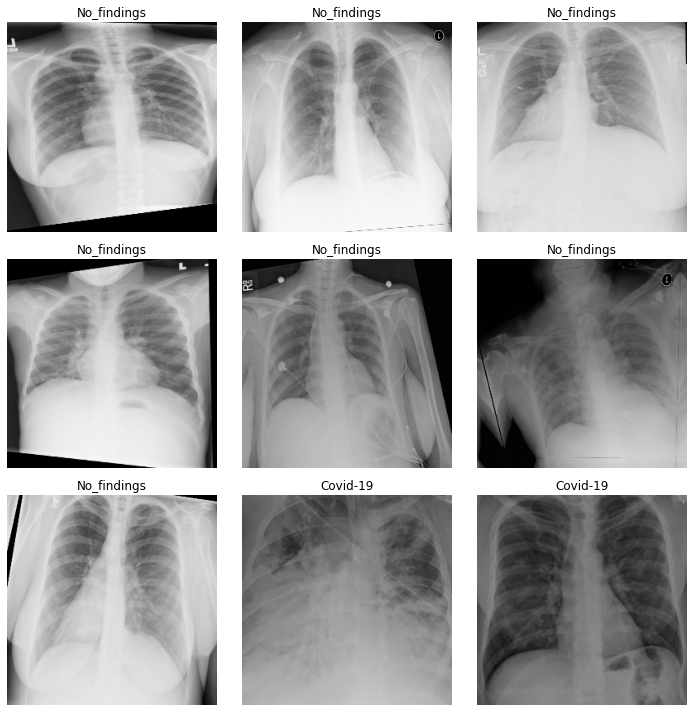

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

## DarkCovidNet (modified Darknet model)

In [ ]:
def conv_block(ni, nf, size=3, stride=1):
    for_pad = lambda s: s if s > 2 else 3
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=size, stride=stride,
                  padding=(for_pad(size) - 1)//2, bias=False), 
        nn.BatchNorm2d(nf),
        nn.LeakyReLU(negative_slope=0.1, inplace=True)  
    )

In [ ]:
def triple_conv(ni, nf):
    return nn.Sequential(
        conv_block(ni, nf),
        conv_block(nf, ni, size=1),  
        conv_block(ni, nf)
    )

In [ ]:
def maxpooling():
    return nn.MaxPool2d(2, stride=2)

In [ ]:
model = nn.Sequential(
    conv_block(3, 8),
    maxpooling(),
    conv_block(8, 16),
    maxpooling(),
    triple_conv(16, 32),
    maxpooling(),
    triple_conv(32, 64),
    maxpooling(),
    triple_conv(64, 128),
    maxpooling(),
    triple_conv(128, 256),
    conv_block(256, 128, size=1),
    conv_block(128, 256),
    conv_layer(256, 2),
    Flatten(),
    nn.Linear(338, 2)
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [ ]:
print(learn.summary())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 256, 256]        216        True      
______________________________________________________________________
BatchNorm2d          [8, 256, 256]        16         True      
______________________________________________________________________
LeakyReLU            [8, 256, 256]        0          False     
______________________________________________________________________
MaxPool2d            [8, 128, 128]        0          False     
______________________________________________________________________
Conv2d               [16, 128, 128]       1,152      True      
______________________________________________________________________
BatchNorm2d          [16, 128, 128]       32         True      
______________________________________________________________________
LeakyReLU            [16, 128, 128]       0          False     
___________________________________________________

In [ ]:
learn.fit_one_cycle(100, max_lr=3e-3)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details.

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details.

In [ ]:
learn.save(path/'model_DarkCovitNet_Binary_08182021', return_path=True)

PosixPath('/content/drive/MyDrive/UTEC-Proyecto/Deep/X-Ray_Image_DataSet/Binary/model_DarkCovitNet_Binary_08182021.pth')

In [ ]:
learn.export()

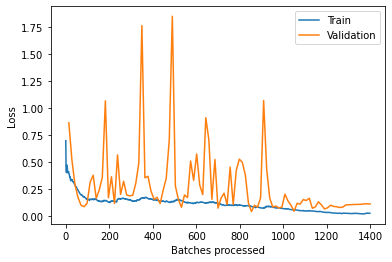

In [ ]:
learn.recorder.plot_losses()

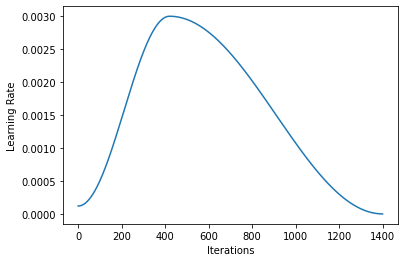

In [ ]:
learn.recorder.plot_lr()

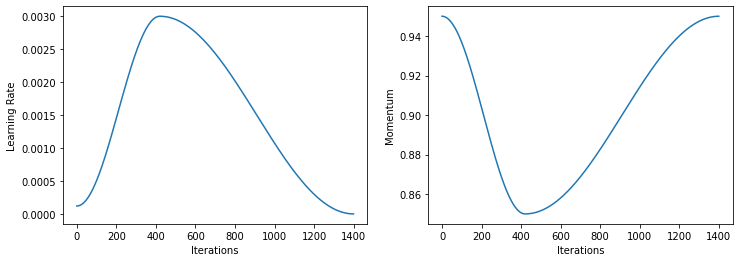

In [ ]:
learn.recorder.plot_lr(show_moms=True)

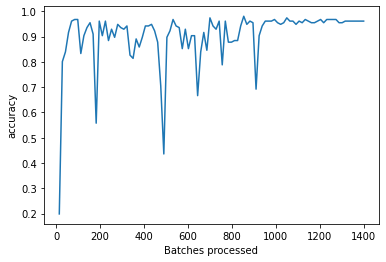

In [ ]:
learn.recorder.plot_metrics()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

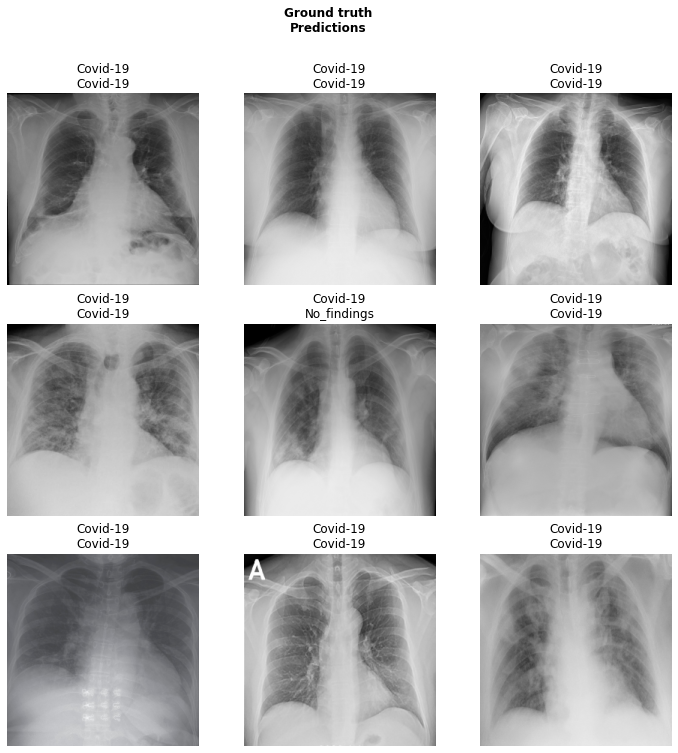

In [ ]:
learn.show_results(rows=3)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

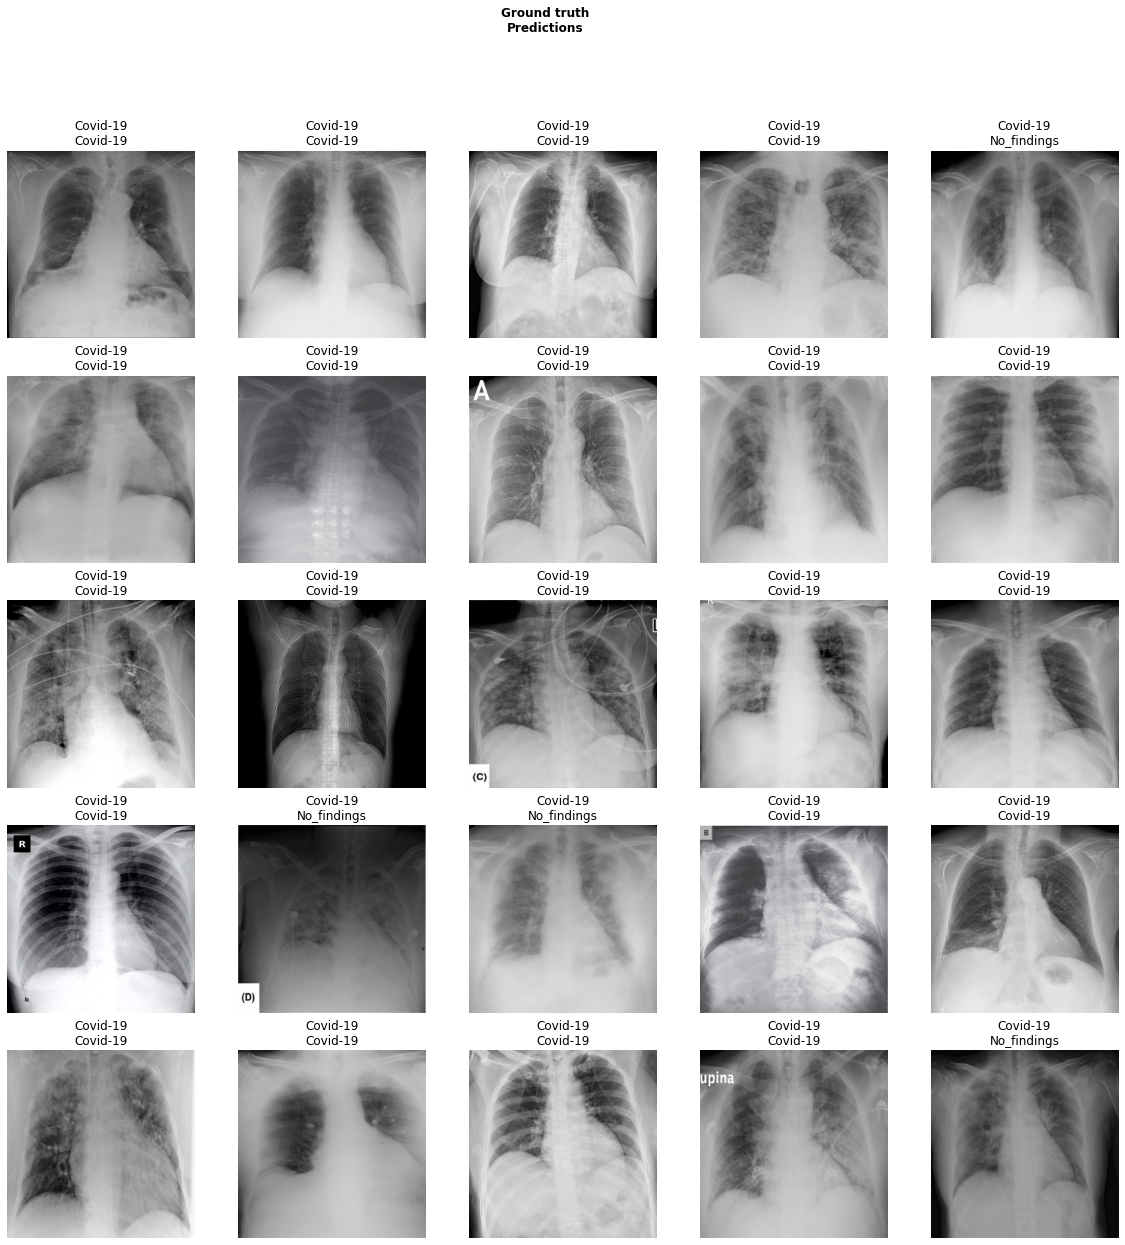

In [ ]:
learn.show_results()

In [ ]:
print("Number of examples in testing:", len(data.valid_ds))

Number of examples in testing: 156


In [ ]:
probs,targets = learn.get_preds(ds_type=DatasetType.Valid) 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

In [ ]:
accuracy(probs,targets)

tensor(0.9615)

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Covid-19', 'No_findings'], 2, 469, 156)

In [ ]:
probs = np.argmax(probs, axis=1)
correct = 0
for idx, pred in enumerate(probs):
    if pred == targets[idx]:
        correct += 1
accuracy = correct / len(probs)
print(len(probs), correct, accuracy)

from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold=np.inf) 
cm1 = confusion_matrix(targets, probs)
print(cm1)

from sklearn.metrics import classification_report
y_true1 = targets
y_pred1 = probs
target_names = ['Covid-19', 'No_findings']
print(classification_report(y_true1, y_pred1, target_names=target_names))

156 150 0.9615384615384616
[[ 26   5]
 [  1 124]]
              precision    recall  f1-score   support

    Covid-19       0.96      0.84      0.90        31
 No_findings       0.96      0.99      0.98       125

    accuracy                           0.96       156
   macro avg       0.96      0.92      0.94       156
weighted avg       0.96      0.96      0.96       156



In [ ]:
interp_dark = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packa

In [ ]:
interp_dark.most_confused(min_val=2)

[('Covid-19', 'No_findings', 5)]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

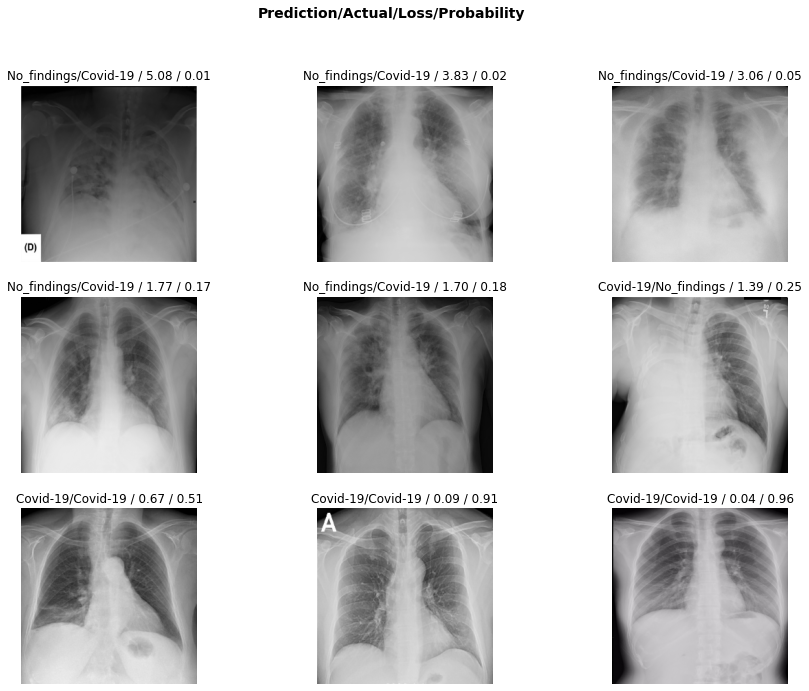

In [ ]:
interp_dark.plot_top_losses(9,figsize=(15,11))

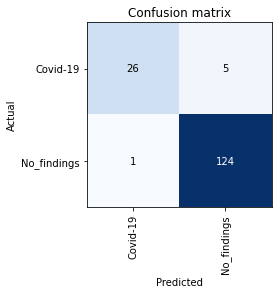

In [ ]:
cm_fig = interp_dark.plot_confusion_matrix(return_fig=True)
ax = cm_fig.gca()
ax.set_ylim(interp_dark.data.c - .5, - .5);

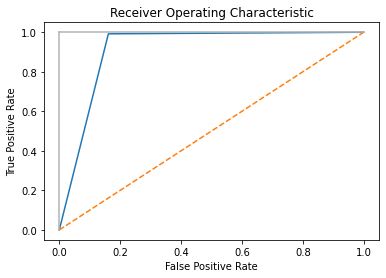

In [ ]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_true1,
                                                               y_pred1)
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [ ]:
learn.recorder.plot_lr()

AttributeError: ignored

In [ ]:
########################################3333

In [ ]:
help(fastbook)

In [ ]:
#learn_test = learn.load(path/'model_DarkCovitNet_Binary_08182021')

In [ ]:
#learn_test.export(path/'model_DarkCovitNet_Binary_08182021')

In [ ]:
path_ = '/content/drive/MyDrive/UTEC-Proyecto/Deep/X-Ray_Image_DataSet/Binary/'

In [ ]:
test = ImageList.from_folder(f'{path_}TEST (1)')

In [ ]:
test

ImageList (158 items)
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
Path: /content/drive/MyDrive/UTEC-Proyecto/Deep/X-Ray_Image_DataSet/Binary/TEST (1)

In [ ]:
learn_ = load_learner(path,test=test).load('/content/drive/MyDrive/UTEC-Proyecto/Deep/X-Ray_Image_DataSet/Binary/model_DarkCovitNet_Binary_08182021')

In [ ]:
log_preds,targets_ = learn_.get_preds(ds_type=DatasetType.Test)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
targets_

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy(log_preds,targets_)

TypeError: ignored

In [ ]:
preds=np.argmax(log_preds,axis=1)

In [ ]:
preds_=np.argmax(log_preds,axis=0)

In [ ]:
targets[:10]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
log_preds[:10]

tensor([[4.4361e-07, 1.0000e+00],
        [1.6175e-03, 9.9838e-01],
        [1.6222e-03, 9.9838e-01],
        [9.8293e-05, 9.9990e-01],
        [3.0573e-08, 1.0000e+00],
        [9.5327e-04, 9.9905e-01],
        [6.0650e-05, 9.9994e-01],
        [2.0715e-05, 9.9998e-01],
        [4.2292e-06, 1.0000e+00],
        [5.4793e-07, 1.0000e+00]])

In [ ]:
preds_[:10]

tensor([153,   4])

In [ ]:
preds[:10]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
fnames = [f.name[:-4] for f in learn_.data.test_ds.items]

In [ ]:
df_sub = pd.DataFrame({'id':fnames,'label':preds},columns=['id','label'])

In [ ]:
df_sub.head()

id  label
0  RSNA-PNEUMONIA_40b8bf1a-038a-4fb0-a92a-0f2405c...      1
1  RSNA-PNEUMONIA_5aa9d87b-8b54-42d2-b2a1-9b48f52...      1
2  RSNA-PNEUMONIA_695fead2-dfc7-4431-a9b7-b82ea46...      1
3  RSNA-PNEUMONIA_7f86ef64-225c-44ba-a1ab-e4ec829...      1
4  RSNA-PNEUMONIA_36fd1a2b-9267-4e60-8eb7-544c498...      1

In [ ]:
df_sub.to_csv(f'{path_}submission.csv',index=False)

In [ ]:
learn_.data.classes

['Covid-19', 'No_findings']